# ISLR Chapter 6 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import stepwise_functions as step # my own based on statstmodels

from itertools import combinations
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.pipeline import Pipeline



### 8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

#### (a) Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\varepsilon$ of length $n = 100$.

#### (b) Generate a response vector $Y$ of length $n = 100$ according to the model
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \varepsilon,
$$
#### where $\beta_0$ , $\beta_1$ , $\beta_2$ , and $\beta_3$ are constants of your choice.

In [2]:
# a
np.random.seed(35465)
x = np.random.normal(0,1.5,100)
epsilon = np.random.normal(0,1,100)

# b
y = 2 - 4*x + x**2 + 2*x**3 + epsilon
# Make 10 degree polinomial of x
X = np.column_stack([x**i for i in range(1,11)])
print(X.shape) 

(100, 10)


#### (c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2 , \dots , X^{10}$. What is the best model obtained according to $C_p$ , BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the $data.frame()$ function to create a single data set containing both $X$ and $Y$.

#### (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [3]:
## This question is not well suited for sklearn because it does not compute
## the log likelyhood for LinearRegression

import stepwise_functions as step # my own based on statstmodels

dir(step)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add1',
 'all_subsets',
 'combinations',
 'drop1',
 'np',
 'pd',
 'report_best_all',
 'sm',
 'step_back',
 'step_forward']

In [4]:
_ = step.report_best_all(sm.OLS, y, X, 10)

    N_var      AIC      BIC Feature0 Feature1 Feature2 Feature3 Feature4  \
644     6  292.929  311.165     True     True     True     True    False   
448     5  293.072  308.703     True    False     True     True    False   
642     6  293.087  311.324     True     True     True     True    False   
708     6  293.178  311.414     True    False     True     True     True   
55      3  293.261  303.681     True     True     True    False    False   
710     6   293.27  311.507     True    False     True     True     True   
447     5  293.308  308.939     True    False     True     True    False   
637     6  293.344   311.58     True     True     True     True     True   
871     7  293.407  314.249     True     True     True    False     True   
649     6  293.434  311.671     True     True     True     True    False   
449     5  293.552  309.183     True    False     True     True    False   

    Feature5 Feature6 Feature7 Feature8 Feature9  
644     True    False    False     T

In [5]:
step.step_back(sm.OLS, y, X, crit='BIC')

,N_var,AIC,BIC,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,3,293.261,303.681,True,True,True,False,False,False,False,False,False,False
2,4,294.888,307.914,True,True,True,False,False,False,False,True,False,False
1,5,296.683,312.314,True,True,True,False,False,True,False,True,False,False
3,6,294.557,312.793,True,True,True,False,False,True,False,True,False,True
2,7,293.939,314.781,True,True,True,False,False,True,True,True,False,True
6,8,294.715,318.161,True,True,True,False,False,True,True,True,True,True
6,9,296.282,322.334,True,True,True,True,False,True,True,True,True,True
0,10,298.282,326.939,True,True,True,True,True,True,True,True,True,True
2,2,460.46,468.275,True,False,True,False,False,False,False,False,False,False
2,1,591.013,596.223,False,False,True,False,False,False,False,False,False,False


In [6]:
step.step_forward(sm.OLS, y, X, crit = 'BIC')

,N_var,AIC,BIC,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,3,293.261,303.681,True,True,True,False,False,False,False,False,False,False
7,4,294.888,307.913,True,True,True,False,False,False,False,False,False,True
2,5,294.394,310.025,True,True,True,False,True,False,False,False,False,True
1,6,295.39,313.626,True,True,True,True,True,False,False,False,False,True
3,7,293.873,314.714,True,True,True,True,True,False,False,True,False,True
2,8,295.158,318.604,True,True,True,True,True,False,True,True,False,True
1,9,296.399,322.451,True,True,True,True,True,True,True,True,False,True
1,10,298.282,326.939,True,True,True,True,True,True,True,True,True,True
2,2,460.46,468.275,True,False,True,False,False,False,False,False,False,False
0,1,772.931,778.141,True,False,False,False,False,False,False,False,False,False


In [7]:
def all_subsets(model, X, y, metric):
    """
    model: sklearn model
    X: exogenous variables for the model (numpy array)
    y: endogenous variable for the model (numpy array)
    metric: sklearn.metrics object
    
    Returns: dictionary
             key = score from metric, value = boolean array for the columns of X
    """
    nfeatures = X.shape[1]
    all_subsets ={}
    modelid = 0
    
    for i in range(1, nfeatures+1):
        for j in combinations(np.arange(X.shape[1]),i):
            score = metric(y, model.fit(X[:,j], y).predict(X[:,j]))
            all_subsets[score] = [x in j for x in np.arange(X.shape[1])]
    return pd.DataFrame(all_subsets).transpose().sort_index()

In [8]:
lm = LinearRegression()

# clearly junk
all_subsets(lm, X, y, mean_squared_error).iloc[:10,:]

,0,1,2,3,4,5,6,7,8,9
0.927691,True,True,True,True,True,True,True,True,True,True
0.927692,True,True,True,True,False,True,True,True,True,True
0.928209,True,True,True,True,True,True,False,True,True,True
0.928781,True,True,True,True,True,True,True,True,False,True
0.930715,True,True,True,False,True,True,True,True,True,True
0.930724,True,True,True,False,True,True,True,True,False,True
0.930790,True,True,True,False,True,True,False,True,True,True
0.931713,True,True,True,False,False,True,True,True,True,True
0.934667,True,True,True,True,True,False,True,True,True,True
0.934779,True,True,True,True,True,True,True,True,True,False


In [9]:
# Comparing with Recursive feature elimination
lm_reduced = RFE(lm, 1, step=1)
lm_reduced.fit(X,y)
print(lm_reduced.ranking_)

lm_reduced = RFECV(lm, cv=10, scoring='neg_mean_squared_error')
lm_reduced.fit(X,y)
print(lm_reduced.ranking_)


[ 1  3  2  4  7  5  6  8  9 10]
[1 1 1 2 5 3 4 6 7 8]


#### (e) Now fit a lasso model to the simulated data, again using $X, X^2 ,\dots , X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

/home/arthur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.08641734305056, tolerance: 1.899900951168187
  positive)


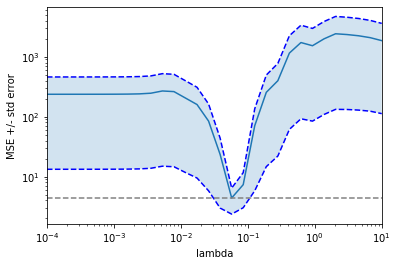

In [10]:
MSE = make_scorer(mean_squared_error, greater_is_better = False)

# in sklearn, lambda -> alpha
alpha_grid = np.logspace(-4,1,30)
param_grid = [{'alpha':alpha_grid}]
lasso = Lasso(max_iter = 50000)
n_folds = 10
cv_regressor = GridSearchCV(lasso, param_grid, cv=n_folds, n_jobs=4, scoring=MSE)
cv_regressor.fit(X, y)

scores = -cv_regressor.cv_results_['mean_test_score']
scores_std = cv_regressor.cv_results_['std_test_score']
_ = plt.figure()
_ = plt.loglog(alpha_grid, scores)

std_error = scores_std / np.sqrt(n_folds)

_ = plt.loglog(alpha_grid, scores + std_error, 'b--')
_ = plt.loglog(alpha_grid, scores - std_error, 'b--')
_ = plt.fill_between(alpha_grid, scores + std_error, scores - std_error, alpha=0.2)

_ = plt.ylabel('MSE +/- std error')
_ = plt.xlabel('lambda')
_ = plt.axhline(np.min(scores), linestyle='--', color='.5')
_ = plt.xlim([alpha_grid[0], alpha_grid[-1]])
plt.show()

In [11]:
cv_regressor.best_estimator_.coef_

array([-2.71649605e+00,  0.00000000e+00,  6.42412585e-01,  4.06548382e-01,
        3.65880008e-01, -5.19924083e-02, -3.45480452e-02,  2.04517064e-03,
        1.03215738e-03,  2.38163662e-06])

#### (f) Now generate a response vector $Y$ according to the model 
$$
Y = \beta_0 + \beta_7 X^7 + \varepsilon,
$$
#### and perform best subset selection and the lasso. Discuss the results obtained.

In [12]:
y = 2 - 4 * x**7 + np.random.normal(0,1,100)

_ = step.report_best_all(sm.OLS, y, X, 10)

   N_var      AIC      BIC Feature0 Feature1 Feature2 Feature3 Feature4  \
6      1  258.398  263.608    False    False    False    False    False   
66     3  260.003  270.424     True    False     True    False    False   
15     2   260.06  267.876     True    False    False    False    False   
50     2  260.151  267.966    False    False    False    False    False   
41     2  260.183  267.998    False    False    False    False     True   
51     2  260.193  268.008    False    False    False    False    False   
49     2  260.259  268.075    False    False    False    False    False   
23     2  260.283  268.098    False     True    False    False    False   
30     2  260.337  268.152    False    False     True    False    False   
45     2  260.345   268.16    False    False    False    False    False   
36     2  260.397  268.212    False    False    False     True    False   

   Feature5 Feature6 Feature7 Feature8 Feature9  
6     False     True    False    False    False  

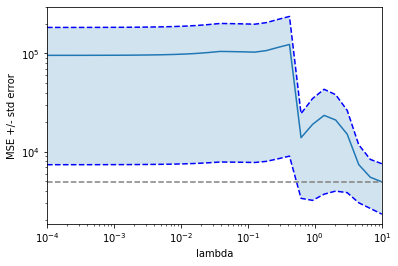

In [13]:
cv_regressor = GridSearchCV(lasso, param_grid, cv=n_folds, n_jobs=4, scoring=MSE)
cv_regressor.fit(X, y)

scores = -cv_regressor.cv_results_['mean_test_score']
scores_std = cv_regressor.cv_results_['std_test_score']
_ = plt.figure()
_ = plt.loglog(alpha_grid, scores)

std_error = scores_std / np.sqrt(n_folds)

_ = plt.loglog(alpha_grid, scores + std_error, 'b--')
_ = plt.loglog(alpha_grid, scores - std_error, 'b--')
_ = plt.fill_between(alpha_grid, scores + std_error, scores - std_error, alpha=0.2)

_ = plt.ylabel('MSE +/- std error')
_ = plt.xlabel('lambda')
_ = plt.axhline(np.min(scores), linestyle='--', color='.5')
_ = plt.xlim([alpha_grid[0], alpha_grid[-1]])
plt.show()

In [14]:
cv_regressor.best_estimator_.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.85479284e+00,
       -4.17542028e+00, -2.24030728e+00, -2.73970014e+00,  1.16788599e-01,
       -9.09678705e-02,  6.62489428e-03])

### 9. In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

#### (a) Split the data set into a training set and a test set.

In [15]:
College = pd.read_csv('College.csv', index_col=[0])
print(College.columns)
print(College.info())

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad

In [16]:
y = College['Apps']
X = pd.get_dummies(College.drop('Apps', axis=1), drop_first=True)
X.columns

Index(['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private_Yes'],
      dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

#### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [18]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
lm_mse = mean_squared_error(y_test, y_pred)
print(lm_mse)

741465.4483133695


#### (c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

#### (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [19]:
ridge = Ridge(tol=10**(-12))
lasso = Lasso(max_iter = 100000)

regressors = [ridge, lasso]
reg_names = ['Ridge', 'Lasso']

alpha_grid = np.logspace(-2, 5, 30)
param_grid = [{'alpha':alpha_grid}]
n_fold = 10
for n_, reg in zip(reg_names,regressors):
    print('\n', n_, '\n')
    reg_cv = GridSearchCV(reg, param_grid, cv=10, scoring='neg_mean_squared_error', iid=False)
    reg_cv.fit(X_test, y_test)
    print(reg_cv.best_params_)
    print(pd.DataFrame({'Parameter':reg_cv.best_estimator_.coef_}, X_test.columns))
    print('\nCV MSE: ',-reg_cv.best_score_)

    y_pred = reg_cv.predict(X_test)
    reg_test_mse = mean_squared_error(y_test, y_pred)
    print('Test MSE: ',reg_test_mse)
    


 Ridge 

{'alpha': 3562.2478902624443}
             Parameter
Accept        1.436295
Enroll       -1.558094
Top10perc    31.399263
Top25perc    -6.226266
F.Undergrad   0.284645
P.Undergrad  -0.072825
Outstate     -0.042222
Room.Board    0.140458
Books         0.309066
Personal     -0.113379
PhD          -2.632332
Terminal     -1.775555
S.F.Ratio     7.330182
perc.alumni  -2.145560
Expend        0.005563
Grad.Rate     2.284762
Private_Yes  -0.938153

CV MSE:  677326.9071812003
Test MSE:  479915.06385161466

 Lasso 

{'alpha': 385.6620421163472}
             Parameter
Accept        1.446437
Enroll       -1.529583
Top10perc    31.687666
Top25perc    -5.096704
F.Undergrad   0.273022
P.Undergrad  -0.070886
Outstate     -0.046538
Room.Board    0.140375
Books         0.259589
Personal     -0.103187
PhD          -1.076766
Terminal     -0.581784
S.F.Ratio     0.000000
perc.alumni  -0.000000
Expend       -0.002617
Grad.Rate     0.000000
Private_Yes  -0.000000

CV MSE:  677339.059570622
Test MSE

#### (e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [20]:
pca = PCA()

pipe = Pipeline(steps=[
    ('reduce',pca),
    ('model',lm),
])

param_grid = [{'reduce__n_components':[x for x in range(1,18)]}]

pca_cv = GridSearchCV(pipe, param_grid, cv=10, iid=False, scoring='neg_mean_squared_error')
pca_cv.fit(X_test, y_test)
print(pca_cv.best_params_)

y_pred = pca_cv.predict(X_test)
reg_test_mse = mean_squared_error(y_test, y_pred)
print('Test MSE: ',reg_test_mse)

{'reduce__n_components': 11}
Test MSE:  533002.3602170128


#### (f) Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [21]:
pls = PLSRegression()
param_grid = [{'n_components':[x for x in range(1,18)]}]
pls_cv = GridSearchCV(pls, param_grid, cv=10, iid=False, scoring='neg_mean_squared_error')
pls_cv.fit(X_test, y_test)
print(pls_cv.best_params_)

y_pred = pls_cv.predict(X_test)
reg_test_mse = mean_squared_error(y_test, y_pred)
print('Test MSE: ',reg_test_mse)

{'n_components': 11}
Test MSE:  467745.66659924504


#### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

### 10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

#### (a) Generate a data set with $p = 20$ features, $n = 1,000$ observations, and an associated quantitative response vector generated according to the model
$$
Y = X\beta + \varepsilon,
$$
#### where $\beta$ has some elements that are exactly equal to zero.

In [22]:
np.random.seed(987432)
X = np.random.normal(0, 1, (1000,20))
beta = np.random.choice(4, 20, replace=True)
print(beta)
y = np.dot(X, beta) + np.random.normal(0,1,1000)
print(y.shape)

[1 2 0 3 3 3 0 2 1 3 1 2 0 0 2 1 3 1 0 0]
(1000,)


#### (b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100)

#### (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [ ]:
nfeatures = X_train.shape[1]
models = []
MSE_values = []
features = []

for i in range(nfeatures):
    MSE_values.append(-1)
    models.append(0)
    features.append(0)
    for j in combinations(np.arange(X.shape[1]),i+1):
        model = LinearRegression()
        model.fit(X_train[:,j], y_train)
        y_pred = model.predict(X_train[:,j])
        mse = mean_squared_error(y_train, y_pred)
        if MSE_values[i] == -1 or MSE_values[i] > mse:
            MSE_values[i] = mse
            models[i] = model
            features[i] = j
print(MSE_values)
print(features)

In [ ]:
plt.semilogy(np.arange(1,nfeatures+1), MSE_values)
plt.show()

#### (d) Plot the test set MSE associated with the best model of each size.

In [ ]:
MSE_test_values = []
for model, feat in zip(models,features):
    y_pred = model.predict(X_test[:,feat])
    MSE_test_values.append(mean_squared_error(y_test, y_pred))

plt.semilogy(np.arange(1, nfeatures+1), MSE_test_values)
plt.show()

print(MSE_test_values)

#### (e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [ ]:
id_best = np.argmin(MSE_test_values) 
print(id_best+1,' features')
print(features[id_best])

#### (f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [ ]:
beta_hat = np.zeros(nfeatures)
for n, i in enumerate(features[id_best]):
    beta_hat[i] = models[id_best].coef_[n]
print(list(zip(beta, beta_hat)))

#### (g) Create a plot displaying $\sqrt{\sum_{j=1}^p(\beta_j-\hat\beta^r_j)^2}$ for a range of values of $r$, where $\hat\beta^r_j$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

In [ ]:
statistic = np.zeros(nfeatures)
for j in range(nfeatures):
    beta_hat = np.zeros(nfeatures)
    for n, i in enumerate(features[j]):
        beta_hat[i] = models[j].coef_[n]
    statistic[j] = np.sqrt(np.sum((beta-beta_hat)**2))

plt.semilogy(np.arange(1,nfeatures+1),statistic)
plt.show()

### 11. We will now try to predict per capita crime rate in the `Boston` data set.

#### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

In [ ]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)
print(X.shape, y.shape)

In [ ]:
lm_rfe = LinearRegression()
lm_pca = LinearRegression()
lasso = Lasso(max_iter = 100000)
ridge = Ridge(tol=10^(-12))
pca = PCA()
pls = PLSRegression()
rfe = RFE(lm_rfe)

folds = 10
reps = 10

pipe_pca = Pipeline(steps=[
    ('reduce', pca),
    ('regress', lm_pca)
])

pipe_rfe = Pipeline(steps=[
    ('reduce', rfe),
    ('regress', lm_rfe)
])

alpha_grid = np.logspace(-4,4,50)
nfeatures = [i+1 for i in range(X.shape[1])]

regressors = [pipe_rfe, lasso, ridge, pipe_pca, pls]
reg_names = ['Backward', 'Lasso', 'Ridge', 'Principal Component', 'Partial Least Squares']
grids = [
    [{'reduce__n_features_to_select' : nfeatures}],  # rfe
    [{'alpha'                        : alpha_grid}], # lasso
    [{'alpha'                        : alpha_grid}], # ridge
    [{'reduce__n_components'         : nfeatures}],  # pca
    [{'n_components'                 : nfeatures}],  # pls
]

scores = []
models = []
for reg, grid, nn in zip(regressors, grids, reg_names):
    model = GridSearchCV(reg, grid, 
                         cv=RepeatedKFold(folds,reps), 
                         iid=False, 
                         scoring='neg_mean_squared_error',
                         n_jobs=4,
                        )
    model.fit(X, y)
    models.append(model)
    scores.append(-model.best_score_)
    print(f'Model: {nn}')
    print(f'Selected parameters: {model.best_params_}')
    print(f'Mean Squared Error from Cross Validation {-model.best_score_}')
    print('\n')

print(f'Best model is {reg_names[np.argmin(scores)]} with CV MSE {np.min(scores)}')

In [ ]:
for model in models:
    low = model.cv_results_['mean_test_score'][model.best_index_] - \
          2 *  model.cv_results_['std_test_score'][model.best_index_] \
          / np.sqrt(folds*reps)
    high = model.cv_results_['mean_test_score'][model.best_index_] + \
           2 * model.cv_results_['std_test_score'][model.best_index_] \
           / np.sqrt(folds*reps)
    print((low,high))

#### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error.

The MSE of all models actually look very similar. There is no significant difference between them.

#### (c) Does your chosen model involve all of the features in the data set? Why or why not?